Solving differential equations with Python!

Date Created: 31 Mar 2018
<br>
Last Modified: 3 Apr 2018
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
font_size = 16
mpl.rcParams['xtick.labelsize'] = font_size
mpl.rcParams['ytick.labelsize'] = font_size

# Euler's method - forward difference
Consider the equation
\begin{equation}
\frac{df}{dx} = kf
\end{equation}

$$
f(0)=1
$$


In [3]:
k = 1

def g(x,f):
    return k*f

In [4]:
x_step = 0.1
x = np.arange(0, 3, x_step)
N = len(x)

f = np.zeros(N)
f[0] = 1
for i in range(0,N-1):
    f[i+1] = f[i] + x_step*g(x[i], f[i])

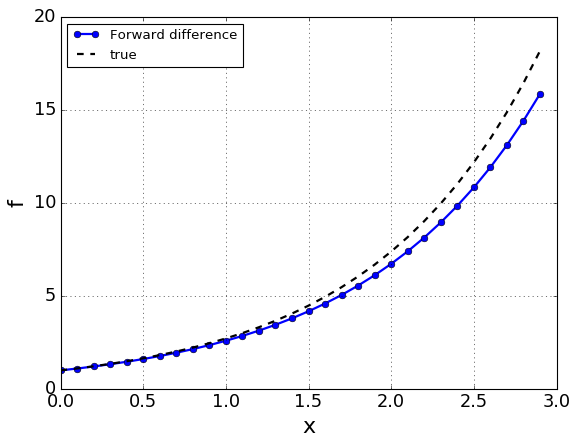

In [5]:
f_true = np.exp(k*x)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, f, 'bo-', lw=2, label='Forward difference')
ax.plot(x, f_true, 'k--', lw=2, label='true')
ax.grid()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f', fontsize=20)

ax.legend(loc='upper left')
plt.show()

# Euler's method - central difference

In [6]:
x_step = 0.1
x = np.arange(0, 3, x_step)
N = len(x)

f_CD = np.zeros(N)
f_CD[0] = 1
f_CD[1] = f_CD[0] + x_step * g(x[0], f_CD[0])
for i in range(1,N-1):
    f_CD[i+1] = f_CD[i-1] + 2*x_step * g(x[i], f_CD[i])

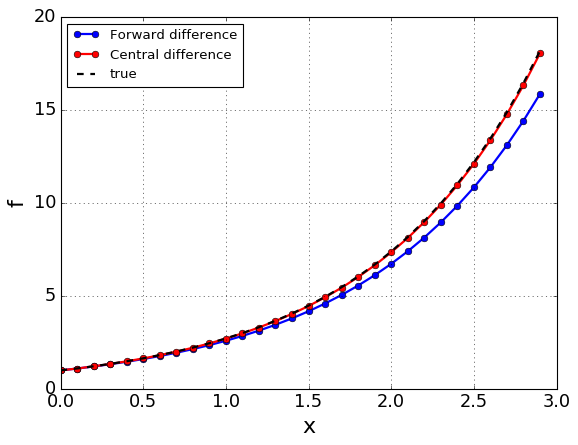

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, f, 'bo-', lw=2, label='Forward difference')
ax.plot(x, f_CD, 'ro-', lw=2, label='Central difference')
ax.plot(x, f_true, 'k--', lw=2, label='true')
ax.grid()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f', fontsize=20)
ax.legend(loc='upper left')

plt.show()

# odeint
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.integrate.odeint.html

In [8]:
from scipy.integrate import odeint

def G(f, x):
    return k*f

f0 = 1
f_odeint, output = odeint(G, f0, x, full_output=True)

In [9]:
f_odeint

array([[  1.        ],
       [  1.10517091],
       [  1.22140275],
       [  1.34985882],
       [  1.49182469],
       [  1.64872127],
       [  1.8221188 ],
       [  2.01375273],
       [  2.22554103],
       [  2.45960316],
       [  2.7182819 ],
       [  3.00416611],
       [  3.32011702],
       [  3.66929678],
       [  4.0552001 ],
       [  4.48168922],
       [  4.95303261],
       [  5.47394761],
       [  6.0496477 ],
       [  6.68589469],
       [  7.38905637],
       [  8.16617022],
       [  9.02501385],
       [  9.97418285],
       [ 11.02317682],
       [ 12.18249446],
       [ 13.4637386 ],
       [ 14.87973236],
       [ 16.44464752],
       [ 18.17414624]])

In [10]:
output

{'hu': array([ 0.03072595,  0.03072595,  0.07070611,  0.07070611,  0.07070611,
         0.07070611,  0.13165033,  0.10547703,  0.10547703,  0.10547703,
         0.10547703,  0.10547703,  0.10547703,  0.10547703,  0.10547703,
         0.13790439,  0.13790439,  0.13790439,  0.13790439,  0.13790439,
         0.13790439,  0.13790439,  0.13790439,  0.13790439,  0.13790439,
         0.13790439,  0.16116515,  0.16116515,  0.16116515]),
 'imxer': -1,
 'leniw': 21,
 'lenrw': 36,
 'message': 'Integration successful.',
 'mused': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=int32),
 'nfe': array([23, 31, 33, 37, 39, 43, 47, 51, 53, 55, 55, 57, 59, 61, 63, 65, 67,
        67, 69, 71, 73, 73, 75, 77, 79, 79, 81, 83, 83], dtype=int32),
 'nje': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int32),
 'nqu': array([4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7,

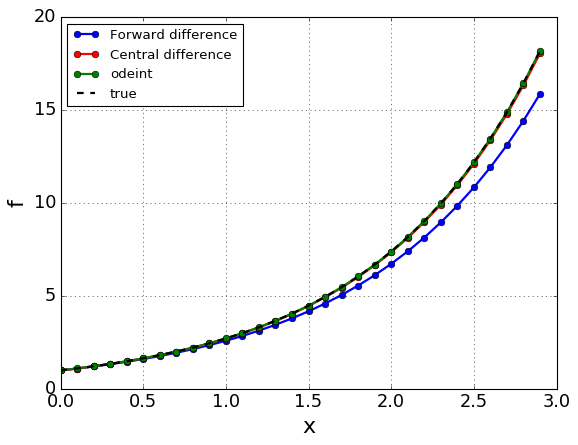

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, f, 'bo-', lw=2, label='Forward difference')
ax.plot(x, f_CD, 'ro-', lw=2, label='Central difference')
ax.plot(x, f_odeint, 'go-', lw=2, label='odeint')
ax.plot(x, f_true, 'k--', lw=2, label='true')
ax.grid()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f', fontsize=20)
ax.legend(loc='upper left')

plt.show()

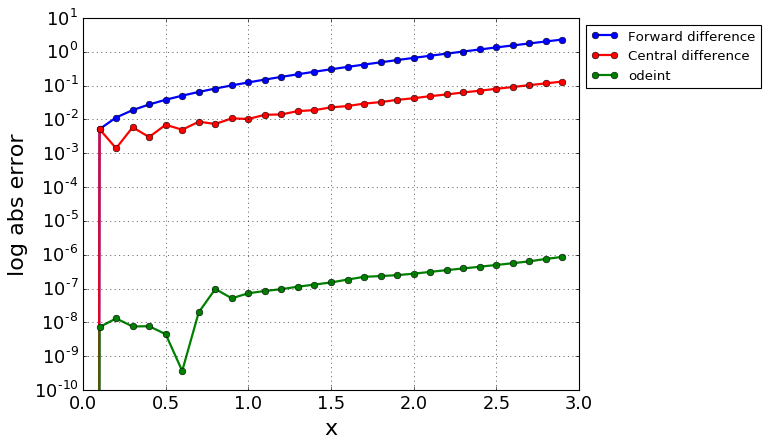

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, (np.abs(f - f_true)), 'bo-', lw=2, label='Forward difference')
ax.plot(x, (np.abs(f_CD - f_true)), 'ro-', lw=2, label='Central difference')
ax.plot(x, (np.abs(f_odeint[:,0] - f_true)), 'go-', lw=2, label='odeint')
ax.grid()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('log abs error', fontsize=20)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_yscale('log')

plt.show()

# Higher order systems
Consider
$$
\frac{d^2f}{dx^2} = kf
$$

Let
\begin{align}
y_0 &= f
\nonumber
\\
y_1 &= \frac{df}{dx}
\nonumber
\end{align}

Then we can write our 2nd order ODE as a system of two coupled 1st order ODEs:

\begin{align}
\frac{dy_0}{dx} &= y_1
\nonumber
\\
\frac{dy_1}{dx} &= ky_0
\nonumber
\end{align}


In [13]:
def G(y,x):
    # Initialise a list to store the derivatives of f
    df = [0, 0]
    
    df[0] = y[1] # 1st derivative
    df[1] = k*y[0] # 2nd derivative
    return df

In [14]:
k = -10
x_step = 0.1
x = np.arange(0, 3, x_step)

IC = [2, 0] # Initial conditions
f, output = odeint(G, IC, x, full_output=True)

In [15]:
f

array([[ 2.        ,  0.        ],
       [ 1.90083056, -1.96683292],
       [ 1.61315678, -3.73861607],
       [ 1.16550717, -5.13964269],
       [ 0.60227491, -6.03097386],
       [-0.02068461, -6.32421678],
       [-0.64159285, -5.99029068],
       [-1.19887469, -5.06231084],
       [-1.63726483, -3.63230447],
       [-1.91328832, -1.84208449],
       [-1.99957208,  0.13081399],
       [-1.8875594 ,  2.09073973],
       [-1.58835851,  3.84332799],
       [-1.131641  ,  5.21477557],
       [-0.56269928,  6.06907677],
       [ 0.062045  ,  6.32151103],
       [ 0.68063629,  5.94704462],
       [ 1.23172928,  4.98281317],
       [ 1.6606724 ,  3.52443891],
       [ 1.92492756,  1.71654802],
       [ 1.99828873, -0.26157199],
       [ 1.87348073, -2.21375206],
       [ 1.56288069, -3.94639559],
       [ 1.09729065, -5.28767729],
       [ 0.52288291, -6.10458299],
       [-0.10337882, -6.31610061],
       [-0.71938853, -5.9012541 ],
       [-1.26405688, -4.90118358],
       [-1.68336945,

In [16]:
output

{'hu': array([ 0.02553538,  0.02553538,  0.02553538,  0.0327442 ,  0.0327442 ,
         0.0327442 ,  0.04172874,  0.04172874,  0.04172874,  0.03920876,
         0.03920876,  0.03920876,  0.01288767,  0.03615793,  0.03615793,
         0.03615793,  0.04219922,  0.04219922,  0.04219922,  0.04005977,
         0.04005977,  0.04005977,  0.01560242,  0.03587991,  0.03587991,
         0.03587991,  0.04206476,  0.04206476,  0.04206476]),
 'imxer': -1,
 'leniw': 22,
 'lenrw': 52,
 'message': 'Integration successful.',
 'mused': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=int32),
 'nfe': array([ 47,  55,  63,  69,  75,  81,  87,  91,  97, 101, 107, 111, 119,
        131, 137, 143, 147, 153, 157, 161, 167, 171, 177, 191, 195, 201,
        207, 211, 215], dtype=int32),
 'nje': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int32),
 'nqu': array([5, 5, 5, 6, 6, 6, 7, 7, 7, 7

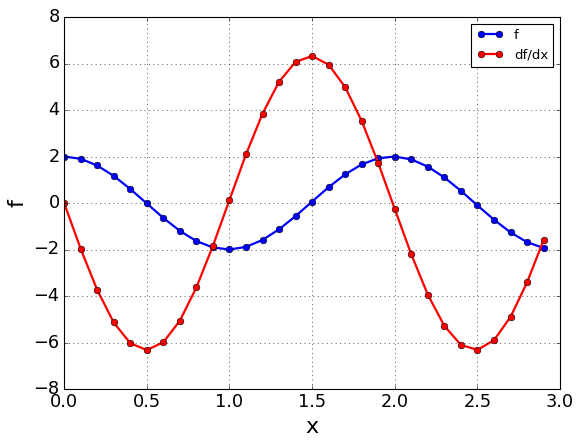

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, f[:,0], 'bo-', lw=2, label='f')
ax.plot(x, f[:,1], 'ro-', lw=2, label='df/dx')
ax.grid()
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f', fontsize=20)
ax.legend(loc='upper right')

plt.show()

# Metronomes and Fireflies

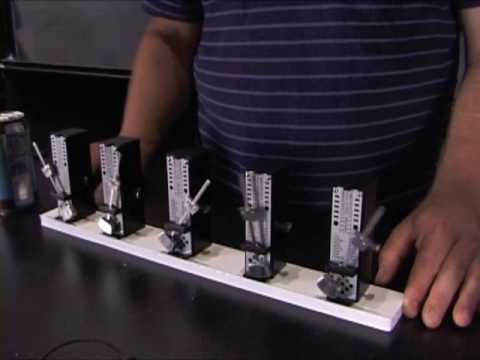

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('Aaxw4zbULMs')

Implementing the equations in Pantaleone (2002).

Pantaleone, "Synchronization of metronomes", Am. J. Phys., 70 (10), pp. 992-1000, 2002.

In [ ]:
To do